Rethinking the G430L and the potential for a chromosphere contiuumn detection

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel, convolve_fft, Gaussian1DKernel
from scipy.interpolate import interp1d

import astropy.units as u
import astropy.constants as const
from astropy.modeling import models, fitting


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [4]:
path = '/media/david/2tb_ext_hd/hddata/mega_muscles/data/g430l/'
root = 'odlm41010'

In [5]:
data = fits.getdata('{}{}_sx1.fits'.format(path, root), 1)[0]
w, f, e, dq = data['WAVELENGTH'], data['FLUX'], data['ERROR'], data['DQ']


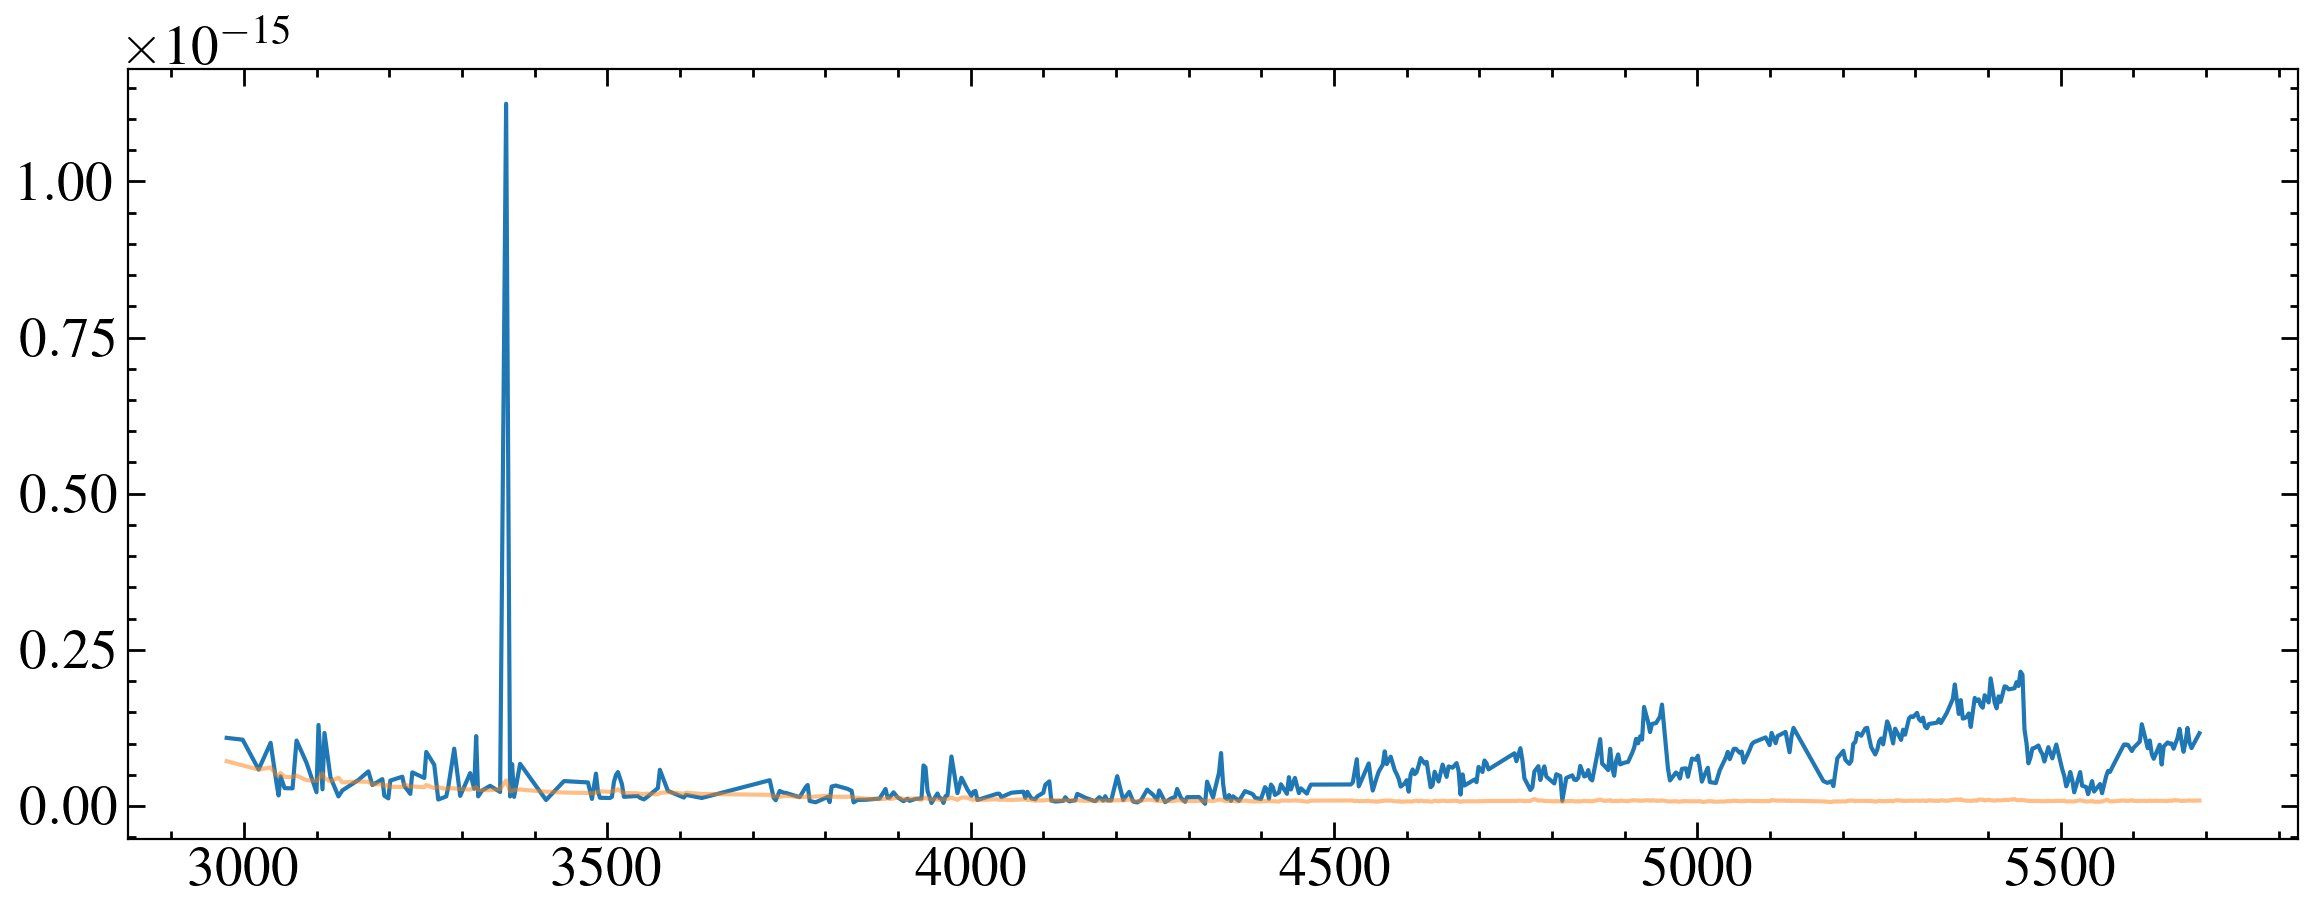

In [6]:
fig, ax = plt.subplots()
ax.plot(w[dq ==0], f[dq ==0])
ax.plot(w[dq ==0], e[dq ==0], alpha=0.5)

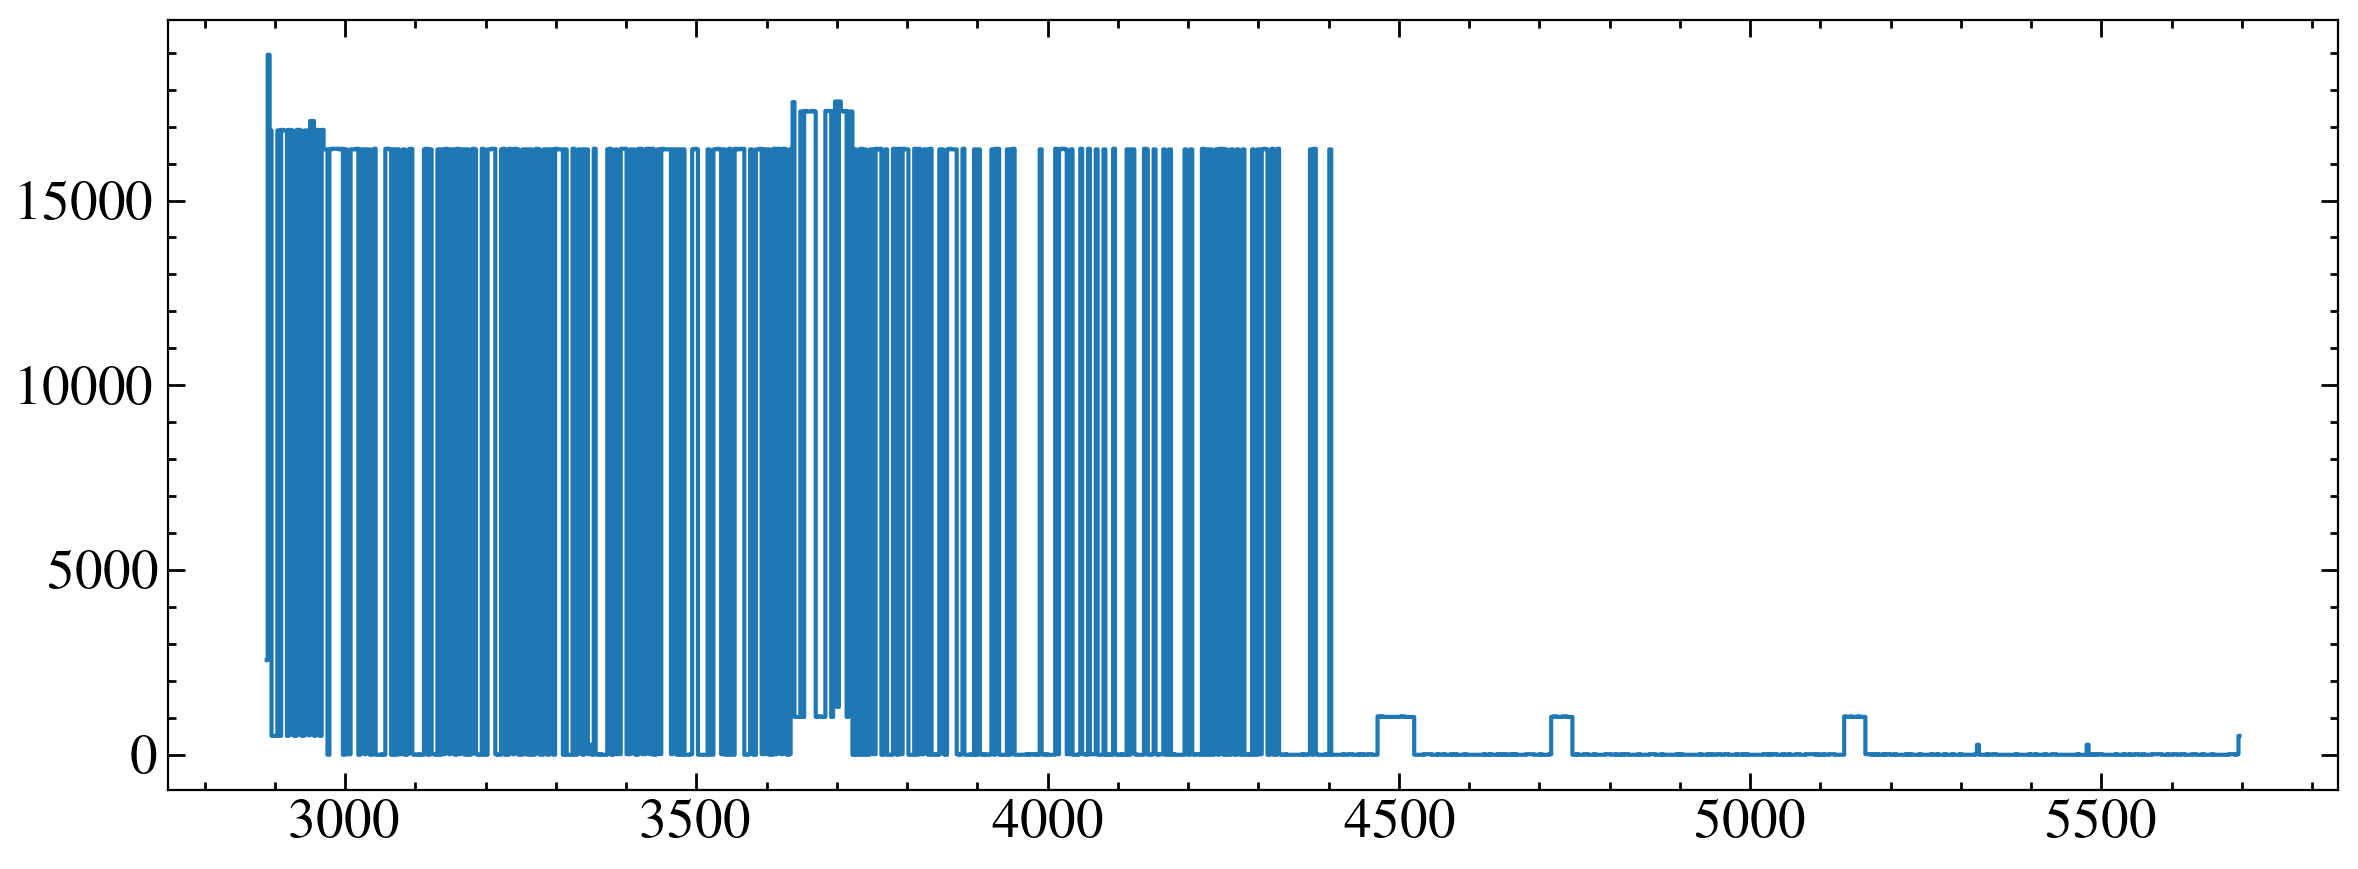

In [7]:
fig, ax = plt.subplots()
ax.step(w, dq, where='mid')
# ax.set_yscale('log')

DQ = 16384 Extracted flux not CTI corrected because gross counts are < 0. Ignoe DQ when rebinning then.

896 2.7463262994415345


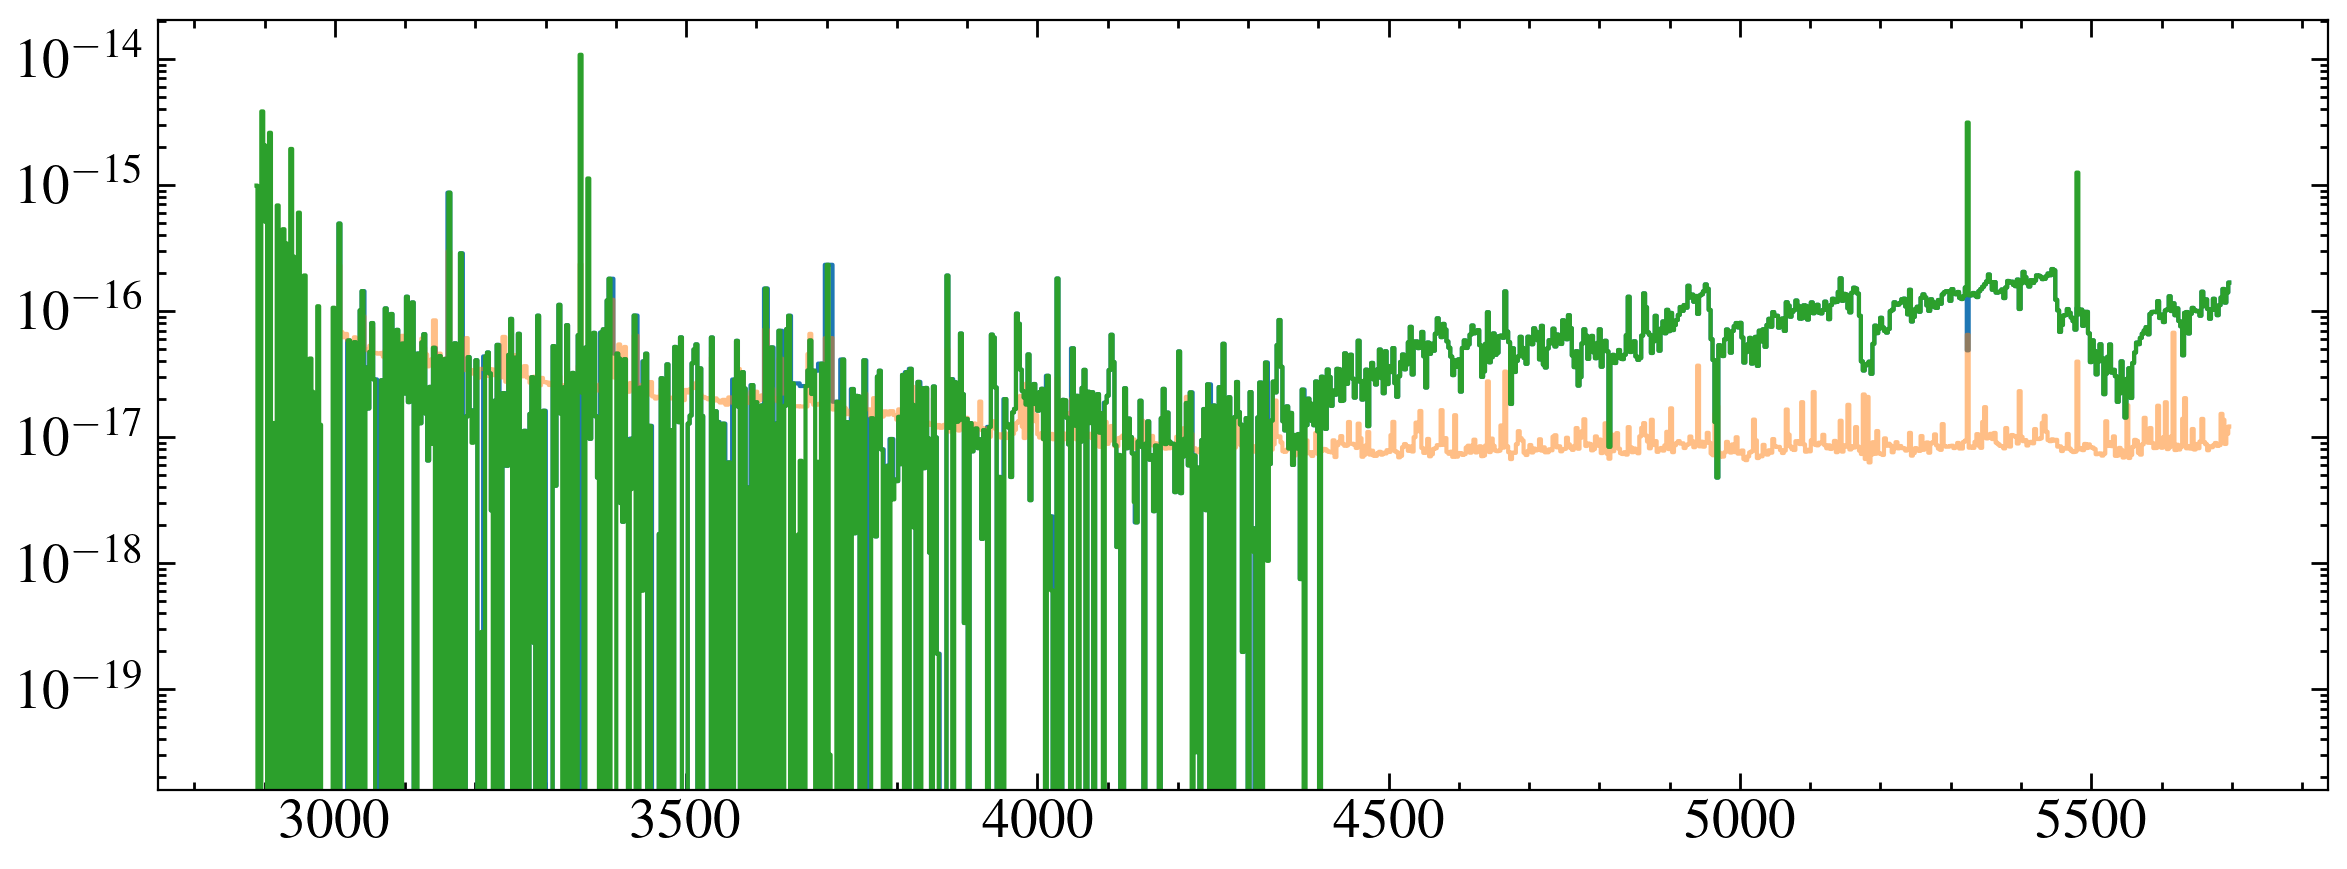

In [57]:
dq1 = dq - 16384  


mask = (w >3000) & (dq1 <1)
w1, f1, e1 = w[mask], f[mask], e[mask]
for i in range(len(f1)):
    if f1[i] > 1e-15:
        f1[i] = np.median([f[i-1], f[i+1]])
        


fig, ax = plt.subplots()
ax.step(w1, f1, where='mid')
ax.step(w1, e1, alpha=0.5, where='mid')

ax.set_yscale('log')

print(len(w1), np.median(np.diff(w1)))


hlsppath = '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/TRAPPIST-1/hlsp_muscles_hst_stis_trappist-1_g430l_v24_component-spec.fits'
data2 = fits.getdata(hlsppath, 1)
ax.step(data2['WAVELENGTH'], data2['FLUX'], where='mid')

#why is the flux in the HLSP bigger???

In [9]:
from specutils import Spectrum1D
from specutils.manipulation import FluxConservingResampler
from astropy.nddata import StdDevUncertainty


14
36


/home/david/anaconda3/envs/stenv/lib/python3.11/site-packages/specutils/manipulation/resample.py:217: RuntimeWarning: divide by zero encountered in reciprocal
  output_errs = InverseVariance(np.reciprocal(output_errs))
/tmp/ipykernel_14807/1067016869.py:18: RuntimeWarning: invalid value encountered in divide
  ax[1].scatter(w2, f2/e2, s=5, c='C0')


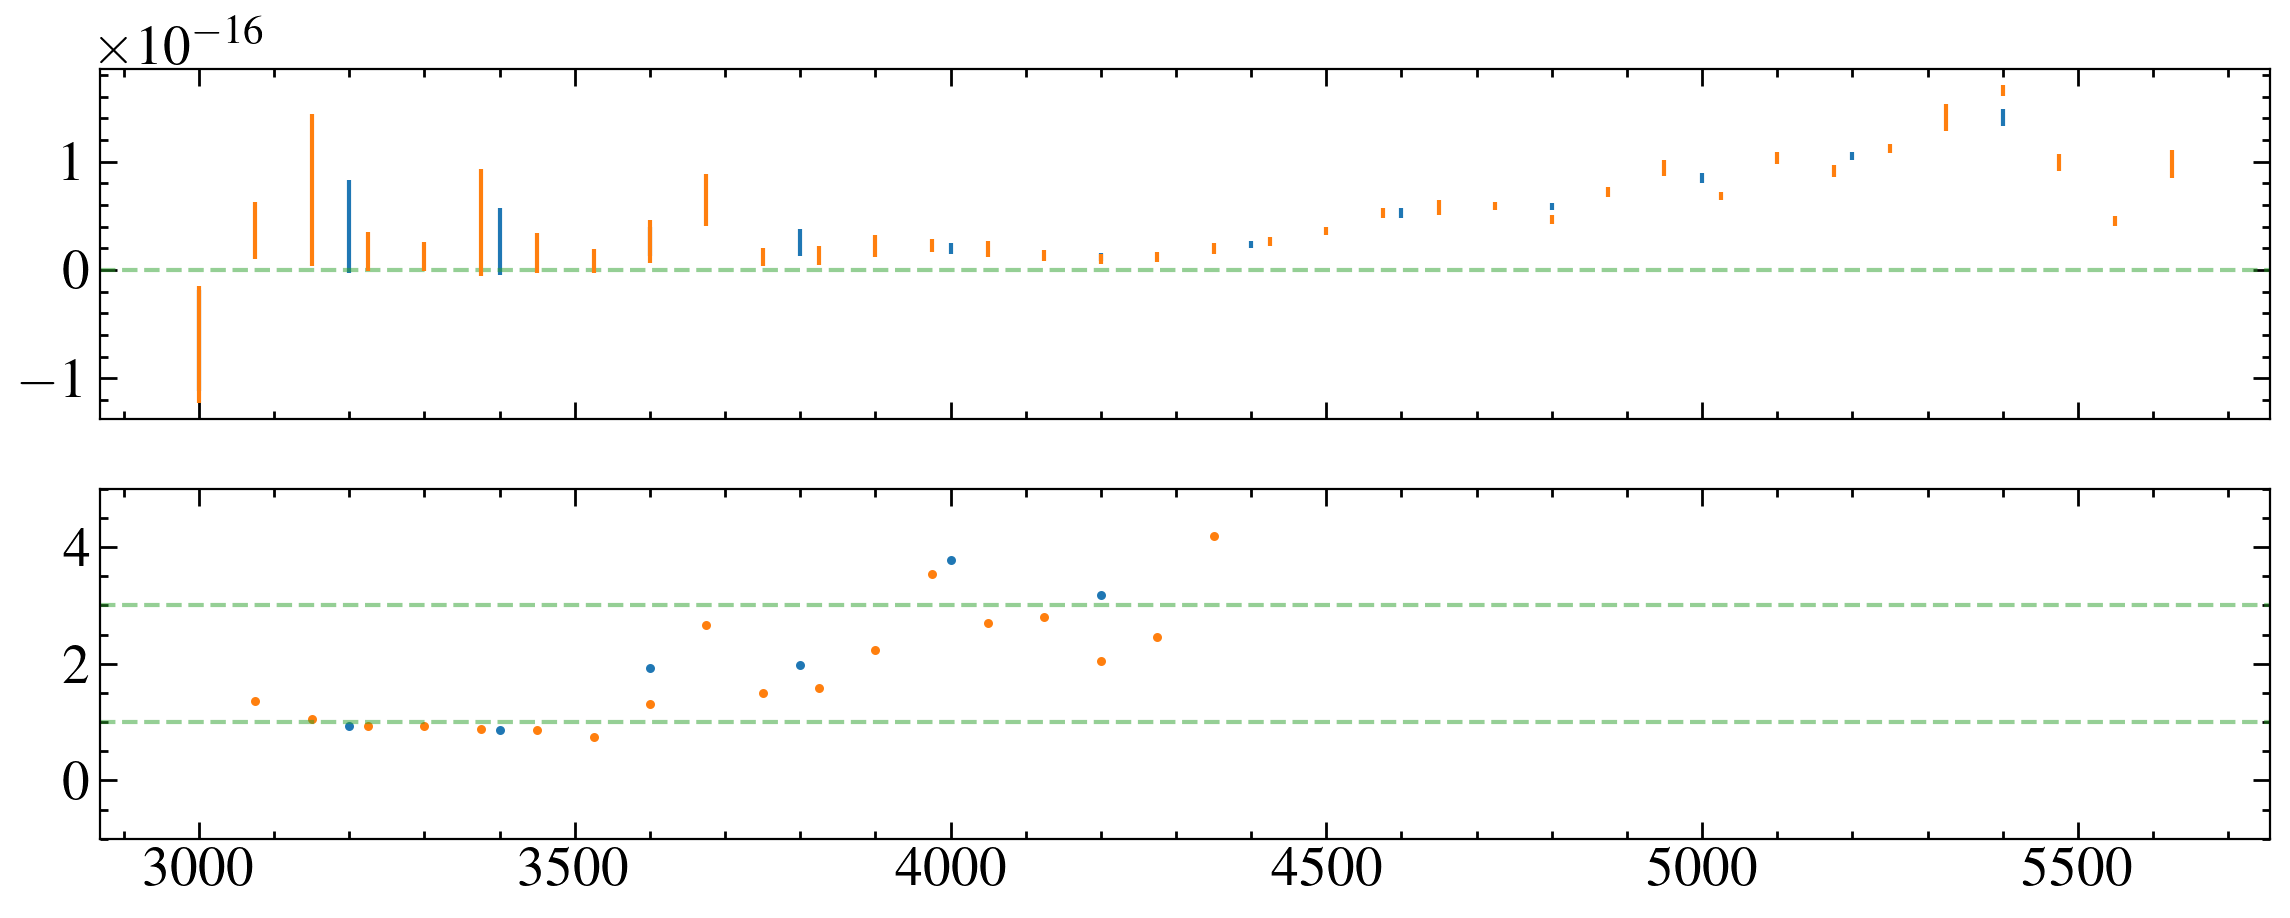

In [10]:
new_wavelength = np.arange(3000, 5690, 200)
print(len(new_wavelength))
fluxcon = FluxConservingResampler(extrapolation_treatment='zero_fill')
input_spec = Spectrum1D(spectral_axis=w1*u.AA, flux=f1*u.Unit('erg cm-2 s-1 AA-1') , uncertainty= StdDevUncertainty(e1))
new_spec_fluxcon = fluxcon(input_spec, new_wavelength*u.AA)
w2 = (new_spec_fluxcon.spectral_axis.value)
f2 = (new_spec_fluxcon.flux.value)
e2 = (1/(new_spec_fluxcon.uncertainty.array**0.5))


fig, ax = plt.subplots(nrows=2, sharex=True)
# ax.step(w2, f2, where='mid')
# ax.step(w2, e2, alpha=0.5, where='mid')
ax[0].errorbar(w2, f2, yerr=e2, ls='none', c='C0')

ax[0].axhline(0, ls='--', c='C2', alpha=0.5)

ax[1].scatter(w2, f2/e2, s=5, c='C0')

ax[1].set_ylim(-1, 5)
ax[1].axhline(3, ls='--', c='C2', alpha=0.5)
ax[1].axhline(1, ls='--', c='C2', alpha=0.5)



new_wavelength = np.arange(3000, 5690, 75)
print(len(new_wavelength))
fluxcon = FluxConservingResampler(extrapolation_treatment='zero_fill')
input_spec = Spectrum1D(spectral_axis=w1*u.AA, flux=f1*u.Unit('erg cm-2 s-1 AA-1') , uncertainty= StdDevUncertainty(e1))
new_spec_fluxcon = fluxcon(input_spec, new_wavelength*u.AA)
w2 = (new_spec_fluxcon.spectral_axis.value)
f2 = (new_spec_fluxcon.flux.value)
e2 = (1/(new_spec_fluxcon.uncertainty.array**0.5))


ax[0].errorbar(w2, f2, yerr=e2, ls='none', c='C1')

ax[1].scatter(w2, f2/e2, s=5, c='C1')




3600 looks right. Where is the moving cut off? early apparently.


In [63]:
phxpath = '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/TRAPPIST-1/hlsp_muscles_model_phx_trappist-1_na_v24_component-spec.fits'

phx = fits.getdata(phxpath, 1)
phxnorm = fits.getheader(phxpath, 0)['NORMFAC']
pw, pf = phx['WAVELENGTH'], phx['FLUX']*phxnorm
pmask = (pw > 3500) & (pw < 5700)
pw, pf = pw[pmask], pf[pmask]
pf = convolve(pf, Gaussian1DKernel(200))


27


Text(0, 0.5, 'Flux (erg s$^{-1}$ cm$^{-2}$ \\AA$^{-1}$)')

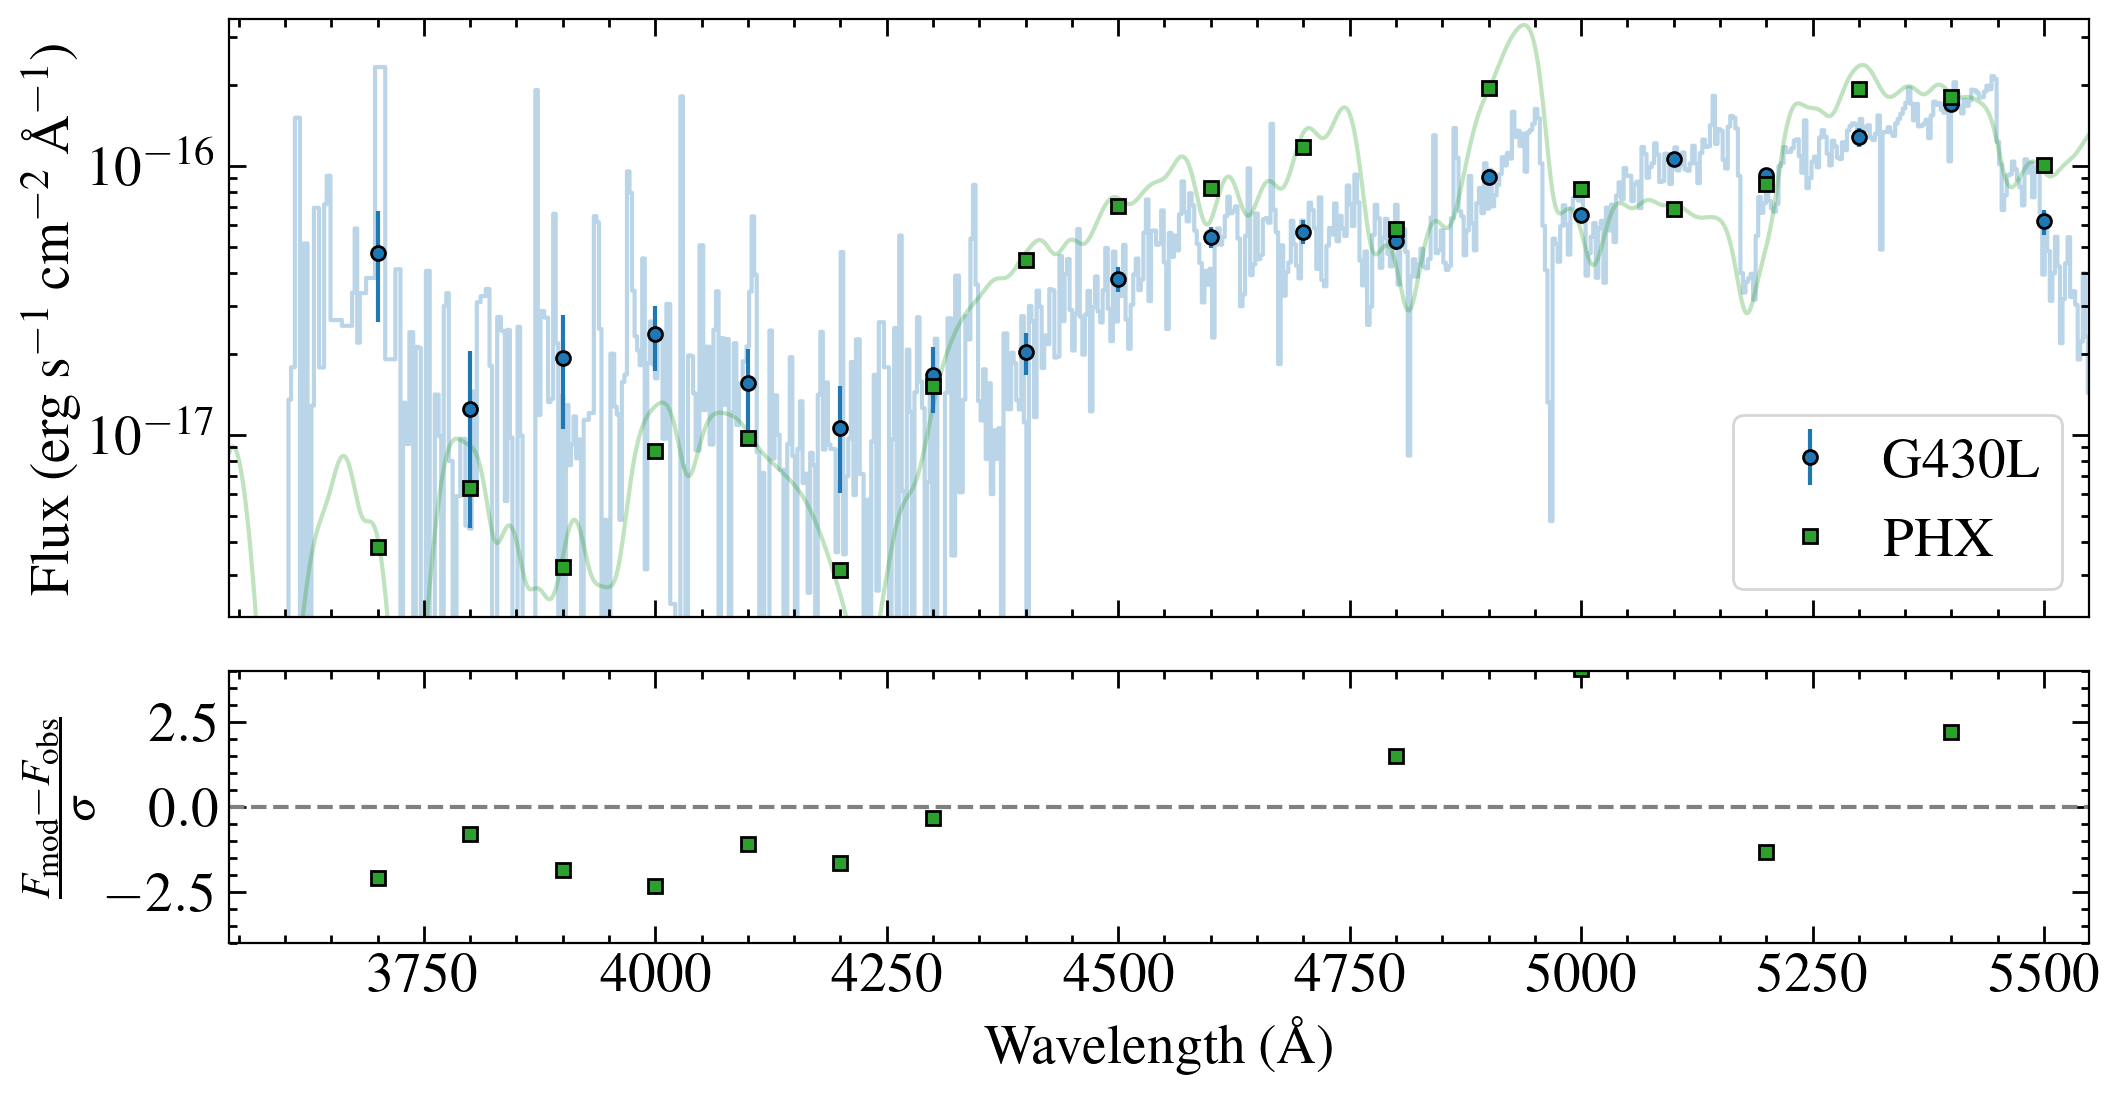

In [120]:
new_wavelength = np.arange(3000, 5690, 100)
print(len(new_wavelength))
fluxcon = FluxConservingResampler(extrapolation_treatment='zero_fill')
input_spec = Spectrum1D(spectral_axis=w1*u.AA, flux=f1*u.Unit('erg cm-2 s-1 AA-1') , uncertainty= StdDevUncertainty(e1))
new_spec_fluxcon = fluxcon(input_spec, new_wavelength*u.AA)
w2 = (new_spec_fluxcon.spectral_axis.value)
f2 = (new_spec_fluxcon.flux.value)
e2 = (1/(new_spec_fluxcon.uncertainty.array**0.5))


input_spec = Spectrum1D(spectral_axis=pw*u.AA, flux=pf*u.Unit('erg cm-2 s-1 AA-1'))
new_spec_fluxcon = fluxcon(input_spec, new_wavelength*u.AA)
pw2 = (new_spec_fluxcon.spectral_axis.value)
pf2 = (new_spec_fluxcon.flux.value)


# norm = max(f2)
# fig, ax = plt.subplots()
fig, axes = plt.subplot_mosaic([[0, 0, 0], [0, 0,0], [1, 1, 1]], sharex=True, figsize=(12, 6))
ax = axes[0]
mask = w2 > 3600
ax.errorbar(w2[mask], f2[mask], yerr=e2[mask], ls='none', c='C0', marker='o', markersize=5,  markeredgecolor='k', label='G430L')
mask = w1 > 3600
ax.step(w1[mask], f1[mask], where='mid', alpha=0.3, c='C0', zorder=-5)
# ax.step(w2[mask], e2[mask], alpha=0.5, where='mid')
mask = w2 > 3600
ax.errorbar(pw2[mask], pf2[mask] , ls='none', c='C2', marker='s', markersize=5, markeredgecolor='k', label='PHX')
ax.plot(pw, pf, alpha=0.3, c='C2', zorder=-4)





ax.set_yscale('log')

ax.set_xlim(3540, 5549)
ax.set_ylim(2.1e-18, 3.5e-16)

ax.legend(frameon=True)

ratio =  pf2[mask]/f2[mask]
ratio_e = ratio*e2[mask]/f2[mask]
ratio_sig = (pf2[mask] - f2[mask])/e2[mask]

# axes[1].errorbar(w2[mask], ratio, yerr=ratio_e, ls='none', c='C3', marker='s', markersize=5, markeredgecolor='k')
axes[1].errorbar(w2[mask], ratio_sig, ls='none', c='C2', marker='s', markersize=5, markeredgecolor='k')

# axes[1].set_yscale('log')
axes[1].axhline(0, ls ='--', c='0.5')
axes[1].set_ylim(-4, 4)

axes[1].set_xlabel('Wavelength (\AA)')
axes[1].set_ylabel(r'$\frac{F_{\mathrm{mod}}-F_{\mathrm{obs}}} {\sigma}$')
ax.set_ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')


849188017.9632366 erg / (s cm2)
1.7437466720572804e+66 erg / (s cm2)


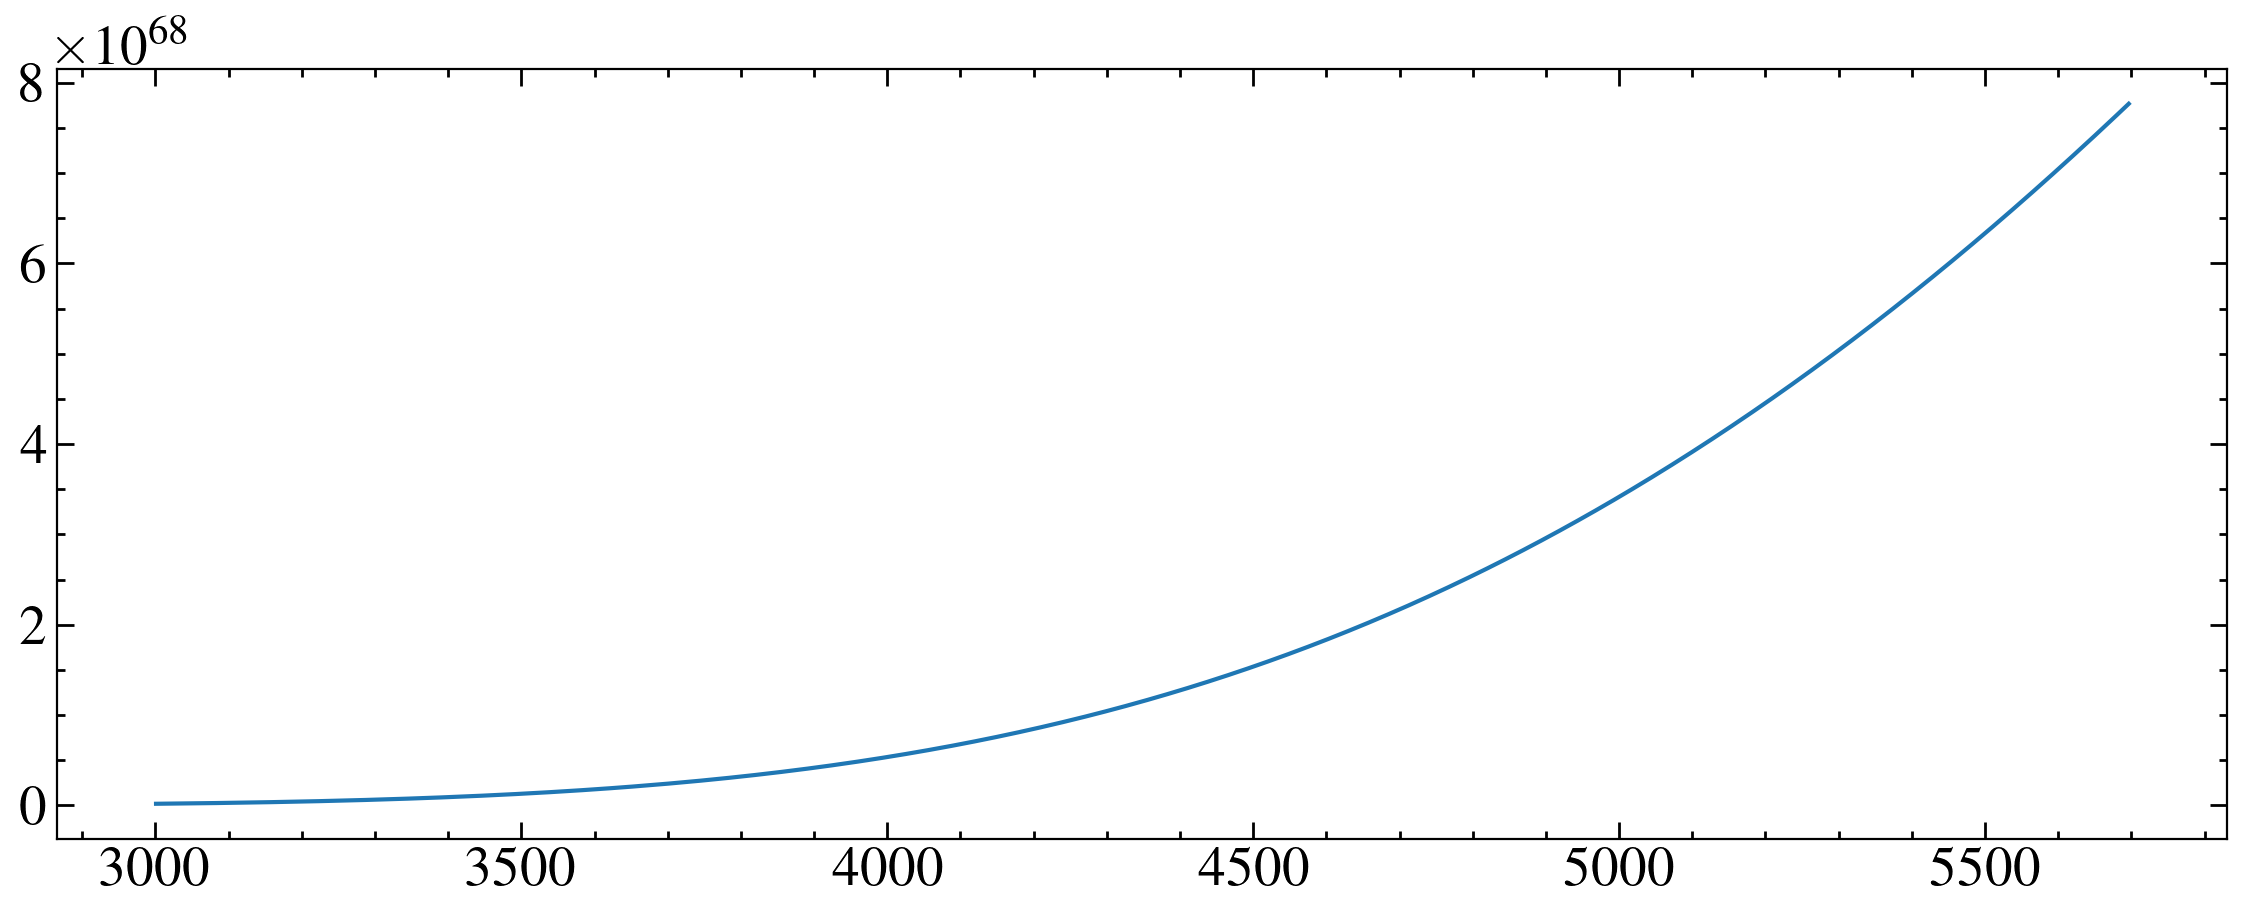

In [149]:
from astropy.modeling.models import BlackBody
#blackbody
lstar = 0.234e-31*u.erg/u.s
tstar= 2619*u.K
rstar = 0.12*u.Rsun 
bb = BlackBody(temperature=tstar, scale=1*u.erg/u.s/u.cm**2/u.sr)
bbflux = bb.bolometric_flux
print(bbflux)
A = (4/3)*np.pi*(rstar.to(u.cm))**2
scale = lstar/ (bbflux * A) 
# bb = BlackBody(temperature=tstar, scale=1/scale)

bbf = bb(w1)/scale*u.sr
print(bbf[0])

plt.plot(w1, bbf)



Need to replace the spectrum in the G430L HLSP file. This can be a problem for Next Week David. Next week is now, blast. Done.

In [15]:
# # ax.step(, data2['FLUX'], where='mid')

# print(data2['WAVELENGTH'][0], data2['WAVELENGTH'][-1])
# print(w[0], w[-1])

2976.1493682669693 5690.913173050628
2888.3135622411687 5696.381658058151


In [19]:
# print(len(w), len(data2['WAVELENGTH']))

1024 484


In [22]:
# botch = Table.read('../optical/t1_g430m_edit.ecsv')
# len(botch['WAVELENGTH'])

392

In [28]:
def wavelength_edges(w):
    """
    Calulates w0 and w1
    """
    diff = np.diff(w)
    diff0 = np.concatenate((np.array([diff[0]]), diff)) #adds an extravalue to make len(diff) = len(w)
    diff1 = np.concatenate((diff, np.array([diff[-1]]))) #adds an extravalue to make len(diff) = len(w)
    w0 = w - diff0/2.
    w1 = w + diff1/2.
    return w0, w1

In [31]:
# print(data2[0])
# print(data2[45])

# data = fits.getdata('{}{}_sx1.fits'.format(path, root), 1)[0]
# w, f, e, dq = data['WAVELENGTH'], data['FLUX'], data['ERROR'], data['DQ']

(2976.1493682669693, 2965.168199314836, 2987.1305372191027, 2.3953983e-16, 1.576392e-16, 1795.0, 0, 58461.07601035, 58461.09730067)
(3368.8944900097194, 3367.5207377843153, 3370.2682422351236, 1.453544e-16, 5.1597816e-17, 1795.0, 0, 58461.07601035, 58461.09730067)


In [43]:
# olddatafits = hdul[1].data

# olddatafits.names

# exptime = olddatafits['EXPTIME'][50]
# expstart = olddatafits['EXPSTART'][50]
# expend = olddatafits['EXPEND'][50]

In [44]:
# w0, w1 = wavelength_edges(w)

# olddata = Table(hdul[1].data)

# olddata.keep_columns([])


# olddata['WAVELENGTH'] = w
# olddata['WAVELENGTH0'] = w0
# olddata['WAVELENGTH1'] = w1
# olddata['FLUX'] = f
# olddata['ERROR'] = w
# olddata['DQ'] = dq
# olddata['EXPTIME'] = np.full(len(w), exptime) #picking 50 to avoid edges
# olddata['EXPSTART'] = np.full(len(w), expstart)
# olddata['EXPEND'] = np.full(len(w), expend)





In [59]:

# hdr = fits.getheader('/media/david/2tb_ext_hd/hddata/mega_muscles/old_t1_g430l.fits', 1)
# hdul[1] = fits.BinTableHDU(olddata, header=hdr)

# # hdul[1].hdr = hdr
# hdul.writeto(hlsppath, overwrite=True)

# hdul = fits.open(hlsppath)
# olddatafits = hdul[1].data
# olddatafits['ERROR'] = e
# hdul.writeto(hlsppath, overwrite=True)

